[Data source](https://community.spotify.com/t5/Music-Chat/Spotify-Top-100-Artists-5-January-2018-Happy-New-Year/td-p/1760627)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read data
df = pd.read_csv('spotify top artists.csv',header=None)

In [4]:
df.head()

,0
0,1.Ed Sheeran 53.4M 0
1,2.Camilla Cabello 42.0M 0
2,3.Post Malone 39.6M 0
3,4.Eminem 38.3M +1
4,5.Maroon5 37.5M -1


In [5]:
df['col1'] = df[0].apply(lambda s:s.split('M ')[0])
df['col2'] = df[0].apply(lambda s:s.split('M ')[1])
df.head()

,0,col1,col2
0,1.Ed Sheeran 53.4M 0,1.Ed Sheeran 53.4,0
1,2.Camilla Cabello 42.0M 0,2.Camilla Cabello 42.0,0
2,3.Post Malone 39.6M 0,3.Post Malone 39.6,0
3,4.Eminem 38.3M +1,4.Eminem 38.3,+1
4,5.Maroon5 37.5M -1,5.Maroon5 37.5,-1


In [7]:
df.drop(columns = 0,inplace=True)

In [8]:
df['rank'] = df['col1'].apply(lambda s:s.split('.')[0])
df.head()

,col1,col2,rank
0,1.Ed Sheeran 53.4,0,1
1,2.Camilla Cabello 42.0,0,2
2,3.Post Malone 39.6,0,3
3,4.Eminem 38.3,+1,4
4,5.Maroon5 37.5,-1,5


In [9]:
def find_name(s):
    ind = 0
    while s[ind] != '.':
        ind += 1
    return s[ind+1:-5]

df['artist name'] = df['col1'].apply(lambda s:find_name(s))

df['monthly listeners'] = df['col1'].apply(lambda s:s[-4:])

In [10]:
df.rename(columns = dict(col2 = 'change'),inplace=True)
df.head()

,col1,change,rank,artist name,monthly listeners
0,1.Ed Sheeran 53.4,0,1,Ed Sheeran,53.4
1,2.Camilla Cabello 42.0,0,2,Camilla Cabello,42.0
2,3.Post Malone 39.6,0,3,Post Malone,39.6
3,4.Eminem 38.3,+1,4,Eminem,38.3
4,5.Maroon5 37.5,-1,5,Maroon5,37.5


In [11]:
df.drop(columns = 'col1',inplace=True)
df.head()

,change,rank,artist name,monthly listeners
0,0,1,Ed Sheeran,53.4
1,0,2,Camilla Cabello,42.0
2,0,3,Post Malone,39.6
3,+1,4,Eminem,38.3
4,-1,5,Maroon5,37.5


In [12]:
df['monthly listeners'] = df['monthly listeners'].apply(lambda s:np.float(s))

In [13]:
df['rank'] = df['rank'].apply(lambda s:int(s))

In [14]:
df.head()

,change,rank,artist name,monthly listeners
0,0,1,Ed Sheeran,53.4
1,0,2,Camilla Cabello,42.0
2,0,3,Post Malone,39.6
3,+1,4,Eminem,38.3
4,-1,5,Maroon5,37.5


In [15]:
df = df[['rank','change','artist name','monthly listeners']]
df.head()

,rank,change,artist name,monthly listeners
0,1,0,Ed Sheeran,53.4
1,2,0,Camilla Cabello,42.0
2,3,0,Post Malone,39.6
3,4,+1,Eminem,38.3
4,5,-1,Maroon5,37.5


Text(0,0.5,'Artist Name')

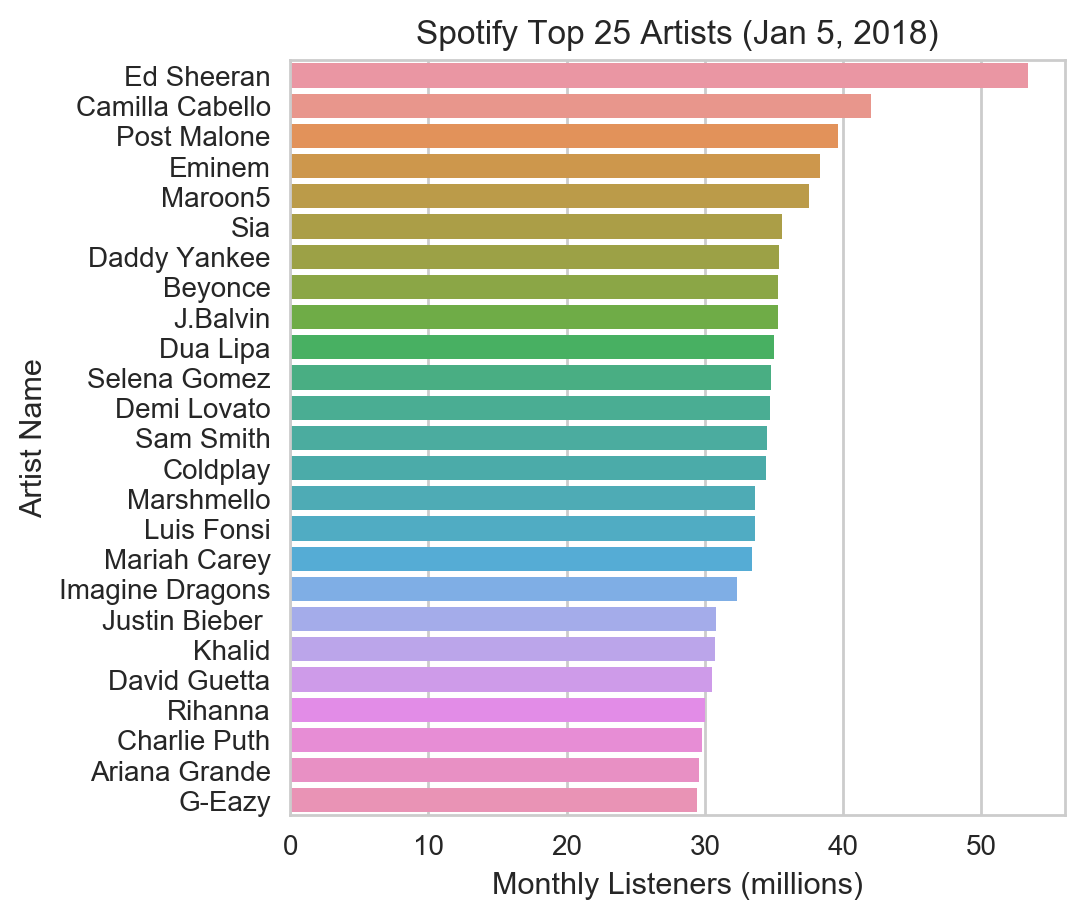

In [16]:
num_to_plot = 25
fig_width = 5
fig_height = 20

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(fig_width, fig_height*num_to_plot/100), dpi=200)
sns.barplot(x='monthly listeners', y='artist name', data = df.iloc[:num_to_plot], orient = 'h')

plt.title('Spotify Top %i Artists (Jan 5, 2018)' % num_to_plot)
plt.xlabel('Monthly Listeners (millions)')
plt.ylabel('Artist Name')